<a href="https://colab.research.google.com/github/BahodirML/Coding_Practices/blob/main/Air.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor


In [2]:
data = pd.read_csv('train_data.csv')
data

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,Indigo,6E-6178,Bangalore,Night,one,Early_Morning,Mumbai,Economy,7.92,45,3153
19996,19997,AirAsia,I5-582,Kolkata,Morning,one,Afternoon,Delhi,Economy,5.83,24,3911
19997,19998,Vistara,UK-832,Chennai,Early_Morning,two_or_more,Evening,Bangalore,Economy,35.33,17,14822
19998,19999,Vistara,UK-996,Mumbai,Evening,one,Morning,Bangalore,Economy,16.33,21,6450


In [4]:
data.shape

(20000, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                20000 non-null  int64  
 1   airline           20000 non-null  object 
 2   flight            20000 non-null  object 
 3   source_city       20000 non-null  object 
 4   departure_time    20000 non-null  object 
 5   stops             20000 non-null  object 
 6   arrival_time      20000 non-null  object 
 7   destination_city  20000 non-null  object 
 8   class             20000 non-null  object 
 9   duration          20000 non-null  float64
 10  days_left         20000 non-null  int64  
 11  price             20000 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 1.8+ MB


In [10]:
data['flight'].value_counts()

UK-706     208
UK-720     190
UK-822     178
UK-836     169
UK-772     169
          ... 
6E-2471      1
6E-821       1
SG-1031      1
6E-759       1
6E-7201      1
Name: flight, Length: 1310, dtype: int64

In [15]:
data.drop('flight', axis = 1, inplace = True)

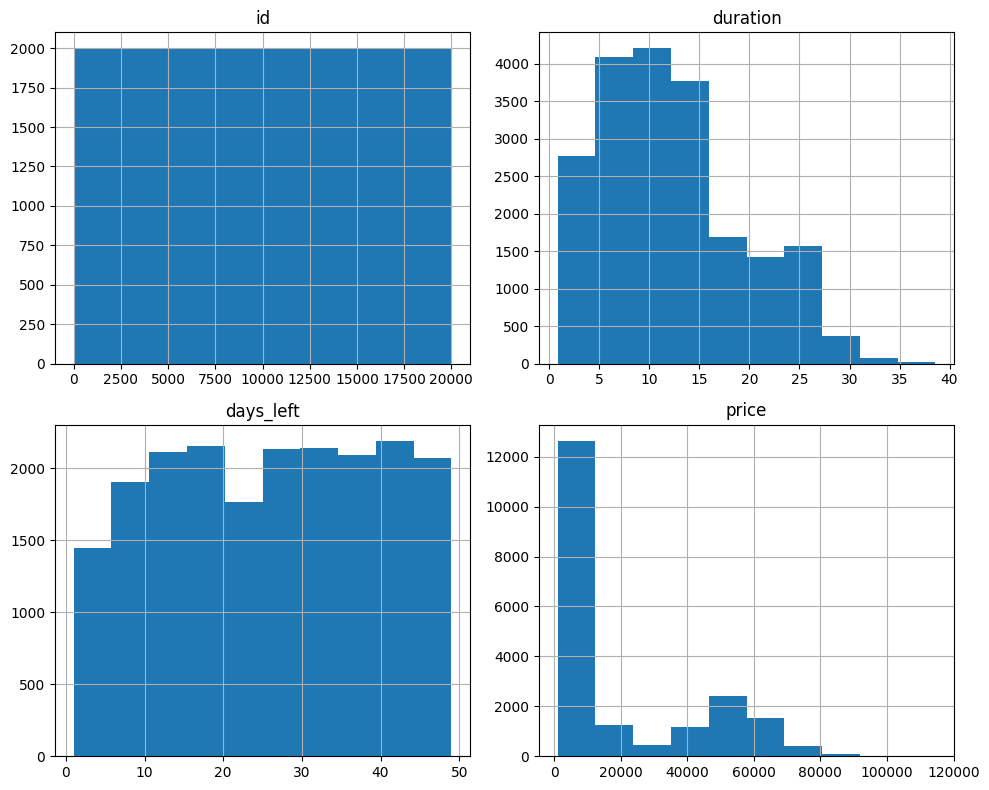

IndexError: ignored

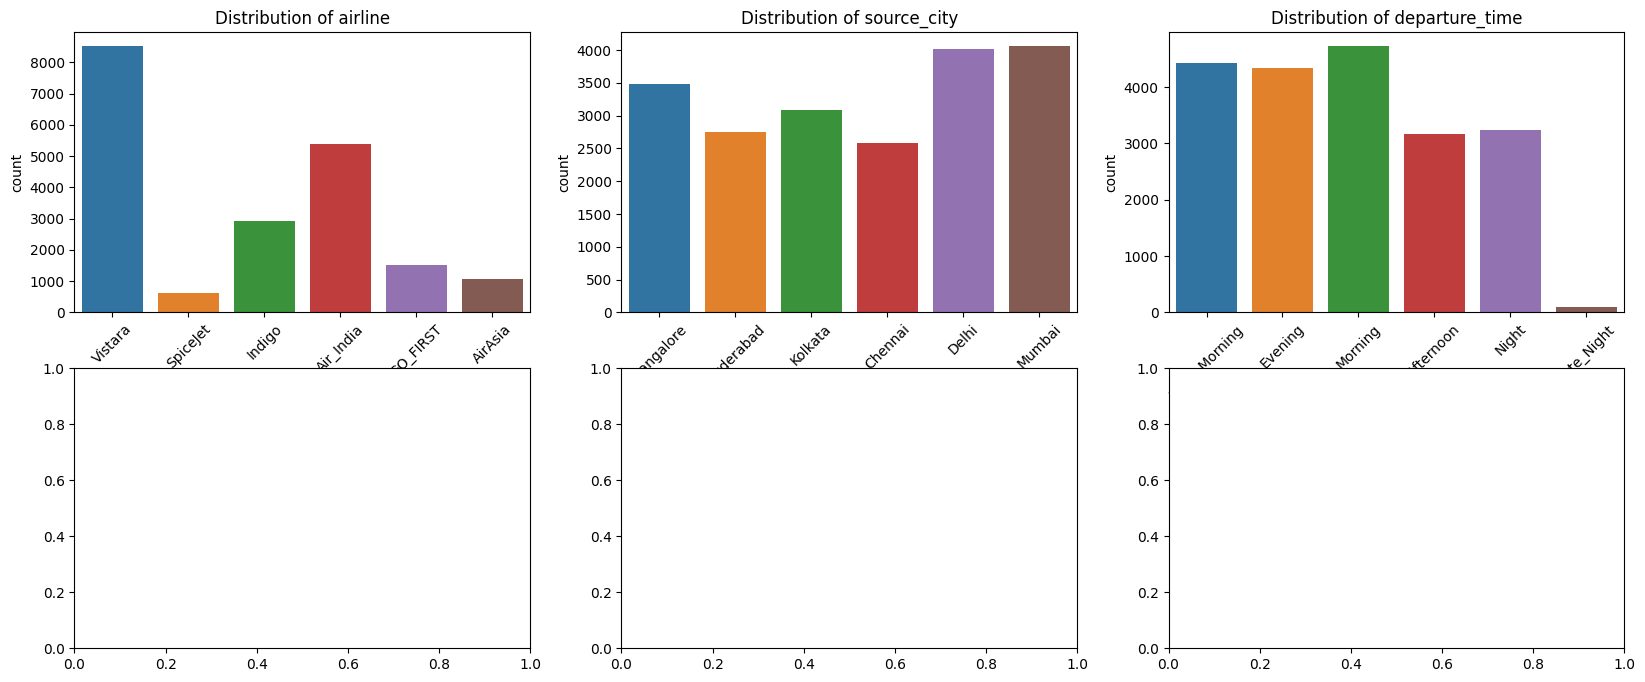

In [17]:

# Histograms for numeric variables
data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# List of categorical variables
categorical_vars = ['airline', 'source_city', 'departure_time',
                    'stops', 'arrival_time', 'arrival_time',
                    'destination_city', 'class']

# Bar plots for categorical variables
fig, axes = plt.subplots(2, 3, figsize=(20, 8))

for idx, col in enumerate(categorical_vars):
    row = idx // 3
    col_idx = idx % 4
    sns.countplot(x=col, data=data, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Distribution of {col}')
    axes[row, col_idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [20]:

data.corrwith(data['price']).abs().sort_values(ascending=False)

<ipython-input-20-c7249e51fe8f>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corrwith(data['price']).abs().sort_values(ascending=False)


price        1.000000
duration     0.213158
days_left    0.102545
id           0.002443
dtype: float64

In [23]:
data.drop('id', axis=1, inplace = True)

In [24]:
data.head(10)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Vistara,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,SpiceJet,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,Vistara,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,Vistara,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,Indigo,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712
5,Air_India,Delhi,Afternoon,one,Morning,Chennai,Business,20.42,5,45257
6,Vistara,Chennai,Evening,one,Morning,Mumbai,Economy,18.42,20,5054
7,Air_India,Bangalore,Morning,zero,Afternoon,Delhi,Business,2.58,30,32923
8,Vistara,Bangalore,Early_Morning,one,Night,Hyderabad,Economy,15.92,12,11383
9,Air_India,Chennai,Night,one,Afternoon,Mumbai,Economy,16.50,18,4357


In [26]:
label_encoder = LabelEncoder()

cat= ("airline","source_city","departure_time","stops", "arrival_time", 'destination_city', 'class')
for i in cat:
    label_encoder= LabelEncoder()
    data[i]= label_encoder.fit_transform(data[i].values)

data


,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,5,0,1,0,5,5,1,14.25,21,7212
1,4,3,2,2,5,4,1,1.75,7,5292
2,5,0,4,0,2,2,0,9.58,5,60553
3,5,4,4,0,2,3,1,6.75,28,5760
4,3,1,1,2,4,5,1,2.00,4,10712
...,...,...,...,...,...,...,...,...,...,...
19995,3,0,5,0,1,5,1,7.92,45,3153
19996,0,4,4,0,0,2,1,5.83,24,3911
19997,5,1,1,1,2,0,1,35.33,17,14822
19998,5,5,2,0,4,0,1,16.33,21,6450


In [28]:
#Spliting the data
scaler = StandardScaler()
X = data.drop('price', axis=1)

X_scaled = scaler.fit_transform(X)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [29]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)
mae_lr = round(mean_absolute_error(y_test,y_pred))
mse_lr= mean_squared_error(y_test, y_pred)
rmse_lr = round(np.sqrt(mse_lr))
r2_lr = round(model_lr.score(X_train,y_train) * 100,2)

print(f"MAE: {mae_lr}")
print(f"RMSE: {rmse_lr}")
print(f"R-squared: {r2_lr}")


MAE: 4624
RMSE: 6976
R-squared: 90.55


In [41]:
data.drop('price', axis=1, inplace=True)

In [42]:
predicted_prices = model_lr.predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [43]:
data['Predicted_Price'] = predicted_prices

In [44]:
data

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,Predicted_Price
0,5,0,1,0,5,5,1,14.25,21,-16838.374039
1,4,3,2,2,5,4,1,1.75,7,-6119.914996
2,5,0,4,0,2,2,0,9.58,5,28569.736071
3,5,4,4,0,2,3,1,6.75,28,-36185.220032
4,3,1,1,2,4,5,1,2.00,4,-2528.004176
...,...,...,...,...,...,...,...,...,...,...
19995,3,0,5,0,1,5,1,7.92,45,-71349.631985
19996,0,4,4,0,0,2,1,5.83,24,-39036.222997
19997,5,1,1,1,2,0,1,35.33,17,2809.673357
19998,5,5,2,0,4,0,1,16.33,21,-15584.552781
